<a href="https://colab.research.google.com/github/richeberry/006975/blob/master/n111a_eda_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 1*

---

# 📝 Assignment



## 1.데이터셋 불러오기 연습

다음 url에서 엑셀 파일을 불러오세요. (pandas excel)

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx>

  - 데이터셋 변수의 이름은 `df1`, `df2`로 저장하세요.
  - row가 아닌 column에 '매출액', '영업이익' 이 가도록 데이터를 transpose 하세요.
  - 이후 아래 링크를 참조하여 첫번째 row를 column name으로 설정하세요.

<https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row>

- 파일은 2개의 시트로 구성되어 있으며 각각 이름은 `008770`, `035250` 입니다.



In [1]:

import pandas as pd

xls = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/Travel.xlsx'

#xls.sheet_names


df1 = pd.read_excel(xls,sheet_name='008770 ')
df2 = pd.read_excel(xls,sheet_name='035250')

df1= df1.T
df2= df2.T

new_header = df1.iloc[0] # first row 저장
df1 = df1[1:] # 데이터들을 first row를 제외한 데이터들로 만듦
df1.columns = new_header #저장했던 first row를 header로 지정

new_header = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = new_header 

print(df1)
print(df2)

주요재무정보                  매출액 영업이익 영업이익(발표기준)  ... 현금DPS(원) 현금배당수익률 현금배당성향(%)
2019/09\n(IFRS연결)     14753  574        574  ...        0     NaN         0
2019/12\n(IFRS연결)     15440  776        776  ...      350     NaN     34.94
2020/03\n(IFRS연결)      9437 -668       -668  ...      NaN     NaN         0
2020/06\n(IFRS연결)      5230 -634       -634  ...      NaN     NaN         0
2020/09\n(IFRS연결)      8795 -198       -198  ...      NaN     NaN       NaN
2020/12(E)\n(IFRS연결)   9980   50        NaN  ...      NaN     NaN       NaN
2021/03(E)\n(IFRS연결)   9761  144        NaN  ...      NaN     NaN       NaN
2021/06(E)\n(IFRS연결)   9820  265        NaN  ...      NaN     NaN       NaN

[8 rows x 32 columns]
주요재무정보                 매출액  영업이익 영업이익(발표기준)  ... 현금DPS(원) 현금배당수익률 현금배당성향(%)
2019/09\n(IFRS연결)     4055  1392       1392  ...        0     NaN         0
2019/12\n(IFRS연결)     3728   641        641  ...      900     NaN    346.75
2020/03\n(IFRS연결)     2360 -1868      -1868  ...      NaN     NaN

## 2. 데이터 확인

- 데이터의 dimension을 확인하세요.
- 데이터의 결측치가 어디에 있는지 확인 후 0으로 대체하세요.
- 각 데이터 별로 **FCF**의 값을 barplot으로 시각화하세요.
  - 0보다 큰 값인 셀 개수의 총합을 `num1`에, 작은 값인 셀 개수의 총합을 `num2`에 저장하세요


In [2]:

# 데이터 dimension 확인
df1.shape
df2.shape


# 데이터 결측치 확인 후 0으로 대체
df1.isnull().sum() # 합쳐줌
df2.isnull().sum()
df1 = df1.fillna(0)
df2 = df2.fillna(0)

print(df1)
print(df2)

주요재무정보                    매출액   영업이익  영업이익(발표기준)  ...  현금DPS(원)  현금배당수익률  현금배당성향(%)
2019/09\n(IFRS연결)     14753.0  574.0       574.0  ...       0.0        0       0.00
2019/12\n(IFRS연결)     15440.0  776.0       776.0  ...     350.0        0      34.94
2020/03\n(IFRS연결)      9437.0 -668.0      -668.0  ...       0.0        0       0.00
2020/06\n(IFRS연결)      5230.0 -634.0      -634.0  ...       0.0        0       0.00
2020/09\n(IFRS연결)      8795.0 -198.0      -198.0  ...       0.0        0       0.00
2020/12(E)\n(IFRS연결)   9980.0   50.0         0.0  ...       0.0        0       0.00
2021/03(E)\n(IFRS연결)   9761.0  144.0         0.0  ...       0.0        0       0.00
2021/06(E)\n(IFRS연결)   9820.0  265.0         0.0  ...       0.0        0       0.00

[8 rows x 32 columns]
주요재무정보                   매출액    영업이익  영업이익(발표기준)  ...  현금DPS(원)  현금배당수익률  현금배당성향(%)
2019/09\n(IFRS연결)     4055.0  1392.0      1392.0  ...       0.0        0       0.00
2019/12\n(IFRS연결)     3728.0   641.0       641.0  ...

In [3]:
# barplot 하면서 폰트가 깨짐 - 폰트 바꾸기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


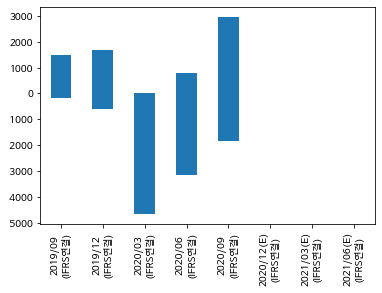

In [11]:
# 데이터 별로 FCF 값 barplot으로 시각화 

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

df1['FCF'].plot.bar()
df2['FCF'].plot.bar()

In [33]:
# 0보다 큰 값의 셀 수의 총합을 num1에, 작은 값의 셀 수의 총합을 num2에 저장

def zero(df):
    num1, num2 = 0,0
    for i in df['FCF']:
        if i>0: num1 += i
        else: num2 += i
    return num1,num2

num1 = zero(df1)[0] + zero(df2)[0]
num2 = zero(df1)[1] + zero(df2)[1]
print(num1,num2)


6941.0 -11263.0


## 3. File export

- 읽었던 엑셀 파일의 내용을 2개의 csv로 각각 출력하세요. (python export csv)

  - 이름은 각각 `df1.csv`, `df2.csv` 입니다.


In [35]:
df1.to_csv('df1.csv',index= False)
df2.to_csv('df2.csv',index= False)

## 4. Error Handling

- 다음의 에러를 고치세요. 결과값은 6912가 나와야합니다.


In [6]:
a = '1234'
b = 5678

int(a)+b

6912

## 5. EDA

아래의 코드는 palmer penguin 데이터를 불러올 수 있는 코드입니다.

```python
import seaborn as sns

pp = sns.load_dataset('penguins')
```

이를 참조하여, `pp`의 `species`와 `sex`변수에 대해서 cross-tabulation을 시행하고, 6개의 값들 중 가장 큰 값을 `num3`에, 가장 작은 값을 `num4`에 저장하세요.

In [82]:
import seaborn as sns
import pandas as pd

pp = sns.load_dataset('penguins')

c_pp = pd.crosstab(pp.species, pp.sex)

num3 = 73
num4 = 34


## 🔥 도전과제 

### penguins 데이터를 계속 사용합니다.

이에 대해 아래의 task들을 시행하세요.

- 결측치 처리 (제거)

- bill_length_mm에 대해서 qqplot 그리기

- island에 대해서 다른 4개의 numerical feature 를 boxplot으로 표현하기

- 각 numerical feature에 대해서 summary statistics : mean, sd, Quantiles(1Q, 2Q, 3Q, 4Q)를 계산하세요.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다